In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
%matplotlib inline

In [2]:
#Reading the dataset
cancer=pd.read_csv(r'C:\Users\c w\Desktop\Python\breast_cancer.csv')
cancer['diagnosis']=le.fit_transform(cancer['diagnosis'])
cancer.drop(['id','Unnamed: 32'],inplace=True,axis=1)
x=cancer.drop(['diagnosis'],axis=1)
y=cancer['diagnosis']
#Splitting the train & test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

# KNN CLASSIFIER OVERVIEW

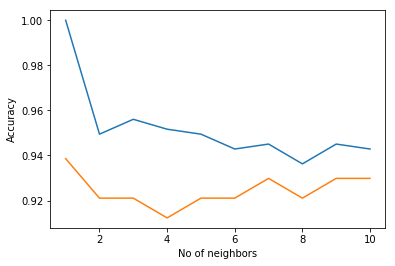

Training Accuracy:  0.945054945054945
Testing Accuracy:  0.9298245614035088
Model Evaluation:  0.91914972616727


array([[71,  4],
       [ 4, 35]], dtype=int64)

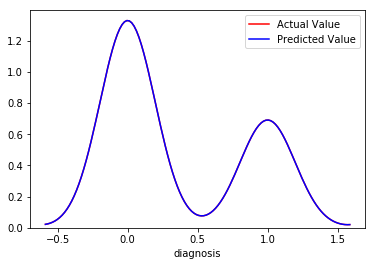

In [3]:
from sklearn.neighbors import KNeighborsClassifier
#Finding number of neighbors we should use.
training_accuracy=[]
testing_accuracy=[]

neighbors=range(1,11)

for i in neighbors:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    training_accuracy.append(knn.score(x_train,y_train))
    testing_accuracy.append(knn.score(x_test,y_test))

plt.plot(neighbors,training_accuracy,label='Accuracy of training set')
plt.plot(neighbors,testing_accuracy,label='Accuracy of testing set')
plt.ylabel('Accuracy')
plt.xlabel('No of neighbors')
plt.show()

knn_new=KNeighborsClassifier(n_neighbors=7)
knn_new.fit(x_train,y_train)
pre=knn_new.predict(x_test)
check=list(zip(y_test,pre))

ax1=sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(pre,hist=False,color='b',label='Predicted Value',ax=ax1)

print('Training Accuracy: ',knn_new.score(x_train,y_train)) 
print('Testing Accuracy: ',knn_new.score(x_test,y_test))

from sklearn.model_selection import cross_val_score
score=cross_val_score(knn_new,x,y,cv=3)
print('Model Evaluation: ',np.mean(score))

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(pre,y_test)
cm

# LOGISTIC REGRESSION

Training Accuracy:  0.9626373626373627
Testing Accuracy:  0.9385964912280702
Model Evaluation:  0.949020699897893


E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[70,  2],
       [ 5, 37]], dtype=int64)

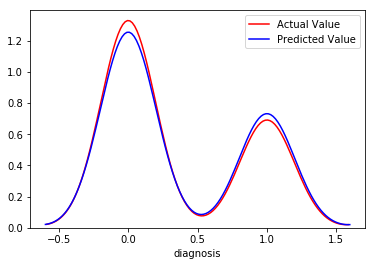

In [4]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
check=list(zip(y_test,pred))
ax2=sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(pred,hist=False,color='b',label='Predicted Value',ax=ax2)

print('Training Accuracy: ',lr.score(x_train,y_train)) 
print('Testing Accuracy: ',lr.score(x_test,y_test))

from sklearn.model_selection import cross_val_score
score=cross_val_score(lr,x,y,cv=3)
print('Model Evaluation: ',np.mean(score))

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(pred,y_test)
cm

# DECISION TREE CLASSIFIER

Training Accuracy:  0.9978021978021978
Testing Accuracy:  0.9473684210526315
Model Evaluation:  0.8980042699340944


array([[72,  3],
       [ 3, 36]], dtype=int64)

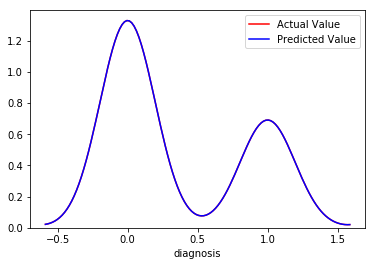

In [5]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=0,max_depth=8)
dtc.fit(x_train,y_train)
prediction=dtc.predict(x_test)
ax3=sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(prediction,hist=False,color='b',label='Predicted Value',ax=ax3)

print('Training Accuracy: ',dtc.score(x_train,y_train)) 
print('Testing Accuracy: ',dtc.score(x_test,y_test))

from sklearn.model_selection import cross_val_score
score=cross_val_score(dtc,x,y,cv=3)
print('Model Evaluation: ',np.mean(score))

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(prediction,y_test)
cm

# RANDOM FOREST

Training Accuracy:  1.0
Testing Accuracy:  0.9824561403508771
Model Evaluation:  0.9613570964448157


array([[73,  0],
       [ 2, 39]], dtype=int64)

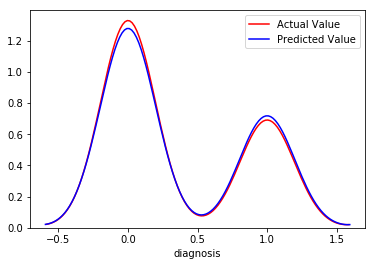

In [6]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100,random_state=0)
rfc.fit(x_train,y_train)
predict=rfc.predict(x_test)
ax4=sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(predict,hist=False,color='b',label='Predicted Value',ax=ax4)

print('Training Accuracy: ',rfc.score(x_train,y_train)) 
print('Testing Accuracy: ',rfc.score(x_test,y_test))

from sklearn.model_selection import cross_val_score
score=cross_val_score(rfc,x,y,cv=3)
print('Model Evaluation: ',np.mean(score))

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(predict,y_test)
cm

# SUPPORT VECTOR MACHINE

Training Accuracy:  0.978021978021978
Testing Accuracy:  0.9122807017543859
Model Evaluation:  0.950784368328228


array([[69,  1],
       [ 9, 35]], dtype=int64)

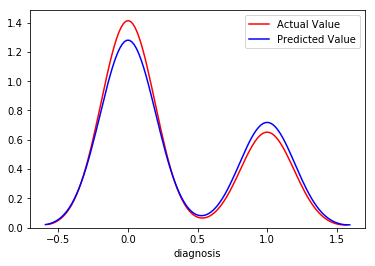

In [10]:
from sklearn.svm import SVC
cancer['diagnosis']=le.fit_transform(cancer['diagnosis'])
x=cancer.drop(['diagnosis'],axis=1)
y=cancer['diagnosis']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
svc=SVC(kernel='linear')
# FOR SUPPORT VECTOR MACHINE WE NEED TO NORMALIZE DATA
xt_train=(x_train-x_train.min())/(x_train.max()-x_train.min())
xt_test=(x_test-x_test.min())/(x_test.max()-x_test.min())

svc.fit(xt_train,y_train)
predict1=svc.predict(xt_test)
ax5=sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(predict,hist=False,color='b',label='Predicted Value',ax=ax5)

print('Training Accuracy: ',svc.score(xt_train,y_train)) 
print('Testing Accuracy: ',svc.score(xt_test,y_test))

from sklearn.model_selection import cross_val_score
score=cross_val_score(svc,x,y,cv=3)
print('Model Evaluation: ',np.mean(score))

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(predict1,y_test)
cm

# KERNAL SVM (NON LINEAR)

Training Accuracy:  0.9494505494505494
Testing Accuracy:  0.9473684210526315
Model Evaluation:  0.6274204028589994


E:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'aut

array([[67,  6],
       [ 0, 41]], dtype=int64)

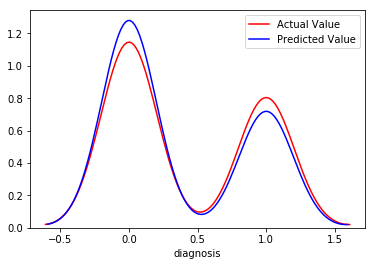

In [11]:
from sklearn.svm import SVC
cancer['diagnosis']=le.fit_transform(cancer['diagnosis'])
x=cancer.drop(['diagnosis'],axis=1)
y=cancer['diagnosis']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
svc=SVC(kernel='rbf')
# FOR SUPPORT VECTOR MACHINE WE NEED TO NORMALIZE DATA
xt_train=(x_train-x_train.min())/(x_train.max()-x_train.min())
xt_test=(x_test-x_test.min())/(x_test.max()-x_test.min())

svc.fit(xt_train,y_train)
predict1=svc.predict(xt_test)
ax5=sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(predict,hist=False,color='b',label='Predicted Value',ax=ax5)

print('Training Accuracy: ',svc.score(xt_train,y_train)) 
print('Testing Accuracy: ',svc.score(xt_test,y_test))

from sklearn.model_selection import cross_val_score
score=cross_val_score(svc,x,y,cv=3)
print('Model Evaluation: ',np.mean(score))

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(predict1,y_test)
cm

# NEURAL NETWORK

Training Accuracy:  0.9978021978021978
Testing Accuracy:  0.9736842105263158
Model Score:  0.9332126612828366


array([[67,  3],
       [ 0, 44]], dtype=int64)

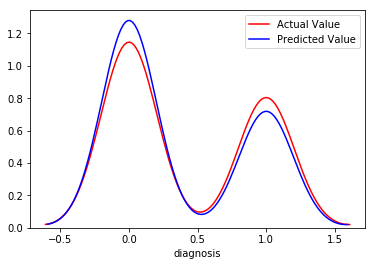

In [8]:
from sklearn.neural_network import MLPClassifier
nn=MLPClassifier(random_state=0,max_iter=1000)

# FOR NEURAL NETWORKS WE NEED TO NORMALIZE & SCALE DATA
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train_scaled=ss.fit(x_train).transform(x_train)
x_test_scaled=ss.fit(x_test).transform(x_test)

nn.fit(x_train_scaled,y_train)
predict2=nn.predict(x_test_scaled)
ax6=sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(predict,hist=False,color='b',label='Predicted Value',ax=ax6)

print('Training Accuracy: ',nn.score(x_train_scaled,y_train)) 
print('Testing Accuracy: ',nn.score(x_test_scaled,y_test))

from sklearn.model_selection import cross_val_score
score=cross_val_score(nn,x,y,cv=3)
print('Model Score: ',np.mean(score))

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(predict2,y_test)
cm

# NAIVE BAIYES

Training Accuracy:  0.9934065934065934
Testing Accuracy:  0.9912280701754386
Model Score:  0.9367492806089297


array([[66,  4],
       [ 1, 43]], dtype=int64)

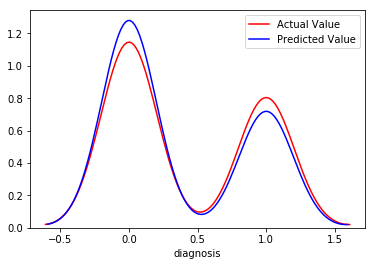

In [12]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

# FOR NEURAL NETWORKS WE NEED TO NORMALIZE & SCALE DATA
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train_scaled=ss.fit(x_train).transform(x_train)
x_test_scaled=ss.fit(x_test).transform(x_test)

nb.fit(x_train_scaled,y_train)
predict3=nb.predict(x_test_scaled)
ax6=sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(predict,hist=False,color='b',label='Predicted Value',ax=ax6)

print('Training Accuracy: ',nn.score(x_train_scaled,y_train)) 
print('Testing Accuracy: ',nn.score(x_test_scaled,y_test))

from sklearn.model_selection import cross_val_score
score=cross_val_score(nb,x,y,cv=3)
print('Model Score: ',np.mean(score))

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(predict3,y_test)
cm